In [1]:
## Example URL
## https://newsapi.org/v2/everything?
## q=tesla&from=2021-05-20&sortBy=publishedAt&
## apiKey=YOUR KEY HERE


## What to import
import requests  ## for getting data from a server GET
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
## For word clouds
## conda install -c conda-forge wordcloud
## May also have to run conda update --all on cmd
#import PIL
#import Pillow
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz

from sklearn.decomposition import LatentDirichletAllocation 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram




In [2]:
topics=["diabetes", "bitcoin", "business", "sports"]

 


## topics needs to be a list of strings (words)
## Next, let's build the csv file
## first and add the column names
## Create a new csv file to save the headlines
filename="NewsHeadlines.csv"
MyFILE=open(filename,"w")  # "a"  for append   "r" for read
## with open
### Place the column names in - write to the first row
WriteThis="LABEL,Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [3]:


endpoint="https://newsapi.org/v2/everything"

################# enter for loop to collect
################# data on three topics
#######################################

for topic in topics:

    ## Dictionary Structure
    URLPost = {'apiKey':'65d56260ecd14e999940d3ea9ed47ab9',
               'q':topic,
               'language':'en'
    }

    response=requests.get(endpoint, URLPost)
    print(response)
    jsontxt = response.json()
    print(jsontxt)
    #####################################################
    
    
    ## Open the file for append
    MyFILE=open(filename, "a")
    LABEL=topic
    for items in jsontxt["articles"]:
        print(items, "\n\n\n")
                  
        #Author=items["author"]
        #Author=str(Author)
        #Author=Author.replace(',', '')
        
        Source=items["source"]["name"]
        print(Source)
        
        Date=items["publishedAt"]
        ##clean up the date
        NewDate=Date.split("T")
        Date=NewDate[0]
        print(Date)
        
        ## CLEAN the Title
        ##----------------------------------------------------------
        ##Replace punctuation with space
        # Accept one or more copies of punctuation         
        # plus zero or more copies of a space
        # and replace it with a single space
        Title=items["title"]
        Title=str(Title)
        #print(Title)
        Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(' +', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(r'\"', ' ', str(Title), flags=re.IGNORECASE)
        
        # and replace it with a single space
        ## NOTE: Using the "^" on the inside of the [] means
        ## we want to look for any chars NOT a-z or A-Z and replace
        ## them with blank. This removes chars that should not be there.
        Title=re.sub(r'[^a-zA-Z]', " ", str(Title), flags=re.VERBOSE)
        Title=Title.replace(',', '')
        Title=' '.join(Title.split())
        Title=re.sub("\n|\r", "", Title)
        print(Title)
        ##----------------------------------------------------------
        
        Headline=items["description"]
        Headline=str(Headline)
        Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
        ## Be sure there are no commas in the headlines or it will
        ## write poorly to a csv file....
        Headline=Headline.replace(',', '')
        Headline=' '.join(Headline.split())
        Headline=re.sub("\n|\r", "", Headline)
        
        ### AS AN OPTION - remove words of a given length............
        Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    
        #print("Author: ", Author, "\n")
        #print("Title: ", Title, "\n")
        #print("Headline News Item: ", Headline, "\n\n")
        
        #print(Author)
        print(Title)
        print(Headline)
        
        WriteThis=str(LABEL)+","+str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
        print(WriteThis)
        
        MyFILE.write(WriteThis)
        
    ## CLOSE THE FILE
    MyFILE.close()
    
################## END for loop



<Response [200]>
{'status': 'ok', 'totalResults': 3385, 'articles': [{'source': {'id': None, 'name': 'CNET'}, 'author': 'Jessica Rendall', 'title': 'What Your Eyes Can Show You About Heart Health and Chronic Disease - CNET', 'description': "Signs of conditions like high blood pressure and diabetes can reflect in vision health. Here's what to know so you can be proactive at your next eye exam.", 'url': 'https://www.cnet.com/health/personal-care/what-your-eyes-can-show-you-about-heart-health-and-chronic-disease/', 'urlToImage': 'https://www.cnet.com/a/img/resize/a021d33a354e4ff57071d9d714e746827d7908a1/hub/2023/09/25/dfb2286c-ba7e-4aa6-a6a2-1842d080a2c5/gettyimages-1193052383.jpg?auto=webp&fit=crop&height=675&width=1200', 'publishedAt': '2024-02-04T13:30:04Z', 'content': "Your eyes do more than take in the information around you. They can reflect what's inside, too.\xa0\r\nIn fact, our eyes have the ability to reveal things about our health that might otherwise fly under t… [+7720 chars]

<Response [200]>
{'status': 'ok', 'totalResults': 12140, 'articles': [{'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Joel Khalili', 'title': 'The Trial Over Bitcoin’s True Creator Is in Session', 'description': 'A UK High Court will settle a long-running debate over whether Craig Wright really is Satoshi Nakamoto, inventor of Bitcoin. Monday’s opening arguments laid the groundwork for both sides.', 'url': 'https://www.wired.com/story/craig-wright-bitcoin-satoshi-nakamoto-trial/', 'urlToImage': 'https://media.wired.com/photos/65bd7e2524c06ba3ede91a33/191:100/w_1280,c_limit/Craig-Wright-Trial-Day-1-Business-Yellow-1494808061.jpg', 'publishedAt': '2024-02-05T21:07:04Z', 'content': 'For eight years, Craig Wright has claimed to be the elusive Bitcoin creator Satoshi Nakamoto. On Monday, in the swelling heat of a UK courtroom, a trial began that will finally settle the question.\r\n… [+3163 chars]'}, {'source': {'id': None, 'name': 'Gizmodo.com'}, 'author': 'Artem Golub and Thomas G

<Response [200]>
{'status': 'ok', 'totalResults': 153472, 'articles': [{'source': {'id': None, 'name': 'Yahoo Entertainment'}, 'author': 'Lawrence Bonk', 'title': "Yelp's new AI features include auto-generated business summaries, among other updates", 'description': 'Yelp just released a substantial app update with more than 20 new features, and several of these tools are packed with, wait for it, AI. The biggest news for regular users is the addition of summaries of business automatically written by AI, which Yelp says w…', 'url': 'https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_0cf58ea1-6836-4132-8ef0-e0d7f2c1bbe1', 'urlToImage': None, 'publishedAt': '2024-01-30T12:00:10Z', 'content': 'Si vous cliquez sur «\xa0Tout accepter\xa0», nos partenaires (y compris 244 qui font partie du Cadre de transparence et de consentement dIAB) et nous utiliserons également des témoins et vos données person… [+982 chars]'}, {'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Pares

<Response [200]>
{'status': 'ok', 'totalResults': 41019, 'articles': [{'source': {'id': None, 'name': 'Yahoo Entertainment'}, 'author': 'Pranav Dixit', 'title': 'ESPN, Fox, and Warner Bros. Discovery are launching a streaming service just for sports this fall', 'description': 'Three of the biggest sports TV companies in the US — ESPN, Fox, and Warner Bros. Discovery — will launch a streaming sports service in the fall of 2024, the companies said in a joint statement on Tuesday. It will stream sporting events from networks that all …', 'url': 'https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_cea6a5eb-1a79-4664-97fc-06941e8ca9e6', 'urlToImage': None, 'publishedAt': '2024-02-06T22:50:50Z', 'content': 'Si vous cliquez sur «\xa0Tout accepter\xa0», nos partenaires (y compris 243 qui font partie du Cadre de transparence et de consentement dIAB) et nous utiliserons également des témoins et vos données person… [+982 chars]'}, {'source': {'id': None, 'name': 'Yahoo Entertainmen

In [4]:
####################################################
##
## Where are we now?
## 
## So far, we have created a csv file
## with labeled data. Each row is a news article
##
## - BUT - 
## We are not done. We need to choose which
## parts of this data to use to model our decision tree
## and we need to convert the data into a data frame.
##
########################################################


BBC_DF=pd.read_csv(filename, error_bad_lines=False)
print(BBC_DF.head())
# iterating the columns 
for col in BBC_DF.columns: 
    print(col) 
    
print(BBC_DF["Headline"])

## REMOVE any rows with NaN in them
BBC_DF = BBC_DF.dropna()
print(BBC_DF["Headline"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
## Keep the labels!

HeadlineLIST=[]
LabelLIST=[]

for nexthead, nextlabel in zip(BBC_DF["Headline"], BBC_DF["LABEL"]):
    HeadlineLIST.append(nexthead)
    LabelLIST.append(nextlabel)

print("The headline list is:\n")
print(HeadlineLIST)

print("The label list is:\n")
print(LabelLIST)




      LABEL        Date            Source  \
0  diabetes  2024-02-04              CNET   
1  diabetes  2024-02-14  Business Insider   
2  diabetes  2024-02-03  Business Insider   
3  diabetes  2024-01-16      Ars Technica   
4  diabetes  2024-01-19       Gizmodo.com   

                                               Title  \
0  What Your Eyes Can Show You About Heart Health...   
1  Over a million boomers on Medicare could save ...   
2  A Gen Z diabetic said a month supply of insuli...   
3  What do Threads Mastodon and hospital records ...   
4  Ozempic Wellbutrin and Hundreds of Other Drugs...   

                                            Headline  
0  Signs conditions like high blood pressure diab...  
1  Boomers will benefit from President Biden pres...  
2  While President Biden insulin price helped low...  
3  Federated learning keeps patient data hospital...  
4  Another year another round inscrutable price i...  
LABEL
Date
Source
Title
Headline
0      Signs conditions like 

/var/folders/83/th0nqdn129x2p_9y6f6w9k5w0000gn/T/ipykernel_21398/1598290620.py:16: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  BBC_DF=pd.read_csv(filename, error_bad_lines=False)


In [5]:
##########################################
## Remove all words that match the topics.
## For example, if the topics are food and covid
## remove these exact words.
##
## We will need to do this by hand. 
NewHeadlineLIST=[]

for element in HeadlineLIST:
    print(element)
    print(type(element))
    ## make into list
    AllWords=element.split(" ")
    print(AllWords)
    
    ## Now remove words that are in your topics
    NewWordsList=[]
    for word in AllWords:
        print(word)
        word=word.lower()
        if word in topics:
            print(word)
        else:
            NewWordsList.append(word)
            
    ##turn back to string
    NewWords=" ".join(NewWordsList)
    ## Place into NewHeadlineLIST
    NewHeadlineLIST.append(NewWords)


##
## Set the     HeadlineLIST to the new one
HeadlineLIST=NewHeadlineLIST
print(HeadlineLIST)     
#########################################
##
##  Build the labeled dataframe
##
######################################################

### Vectorize
## Instantiate your CV
MyCountV=CountVectorizer(
        input="content",  ## because we have a csv file
        lowercase=True, 
        stop_words = "english",
        max_features=50
        )

## Use your CV 
MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
print(type(MyDTM))


ColumnNames=MyCountV.get_feature_names()
#print(type(ColumnNames))


## Build the data frame
MyDTM_DF=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

## Convert the labels from list to df
Labels_DF = DataFrame(LabelLIST,columns=['LABEL'])

## Check your new DF and you new Labels df:
print("Labels\n")
print(Labels_DF)
print("News df\n")
print(MyDTM_DF.iloc[:,0:6])

##Save original DF - without the lables
My_Orig_DF=MyDTM_DF
print(My_Orig_DF)
######################
## AND - just to make sure our dataframe is fair
## let's remove columns called:
## food, bitcoin, and sports (as these are label names)
######################
#MyDTM_DF=MyDTM_DF.drop(topics, axis=1)


 

 



Signs conditions like high blood pressure diabetes reflect vision health Here what know proactive your next exam
<class 'str'>
['Signs', 'conditions', 'like', 'high', 'blood', 'pressure', 'diabetes', 'reflect', 'vision', 'health', 'Here', 'what', 'know', 'proactive', 'your', 'next', 'exam']
Signs
conditions
like
high
blood
pressure
diabetes
diabetes
reflect
vision
health
Here
what
know
proactive
your
next
exam
Boomers will benefit from President Biden prescription drugs cancer rheumatoid arthritis diabetes
<class 'str'>
['Boomers', 'will', 'benefit', 'from', 'President', 'Biden', 'prescription', 'drugs', 'cancer', 'rheumatoid', 'arthritis', 'diabetes']
Boomers
will
benefit
from
President
Biden
prescription
drugs
cancer
rheumatoid
arthritis
diabetes
diabetes
While President Biden insulin price helped lower costs some diabetics expense other supplies still high
<class 'str'>
['While', 'President', 'Biden', 'insulin', 'price', 'helped', 'lower', 'costs', 'some', 'diabetics', 'expense', 'o

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:

## Now - let's create a complete and labeled
## dataframe:
dfs = [Labels_DF, MyDTM_DF]
print(dfs)

Final_News_DF_Labeled = pd.concat(dfs,axis=1, join='inner')
## DF with labels
print(Final_News_DF_Labeled)

Final_News_DF_Labeled.to_csv('final_df.csv')


[        LABEL
0    diabetes
1    diabetes
2    diabetes
3    diabetes
4    diabetes
..        ...
395    sports
396    sports
397    sports
398    sports
399    sports

[400 rows x 1 columns],      according  announced  appeared  betting  called  companies  company  \
0            0          0         0        0       0          0        0   
1            0          0         0        0       0          0        0   
2            0          0         0        0       0          0        0   
3            0          0         0        0       0          0        0   
4            1          0         0        0       0          0        0   
..         ...        ...       ...      ...     ...        ...      ...   
395          0          0         0        0       0          0        0   
396          0          0         0        0       0          0        0   
397          0          0         1        0       0          0        0   
398          0          0         0        0  

       LABEL  according  announced  appeared  betting  called  companies  \
0   diabetes          0          0         0        0       0          0   
1   diabetes          0          0         0        0       0          0   
2   diabetes          0          0         0        0       0          0   
3   diabetes          0          0         0        0       0          0   
4   diabetes          1          0         0        0       0          0   
..       ...        ...        ...       ...      ...     ...        ...   
95  diabetes          0          0         0        0       0          0   
96  diabetes          0          0         0        0       0          0   
97  diabetes          0          0         0        0       0          0   
98  diabetes          0          0         0        0       0          0   
99  diabetes          0          0         0        0       0          0   

    company  crypto  data  ...  study  time  today  told  type  watch  week  \
0       

[<wordcloud.wordcloud.WordCloud object at 0x7f90d14db970>, <wordcloud.wordcloud.WordCloud object at 0x7f90cca09040>, <wordcloud.wordcloud.WordCloud object at 0x7f90cbe10d00>, <wordcloud.wordcloud.WordCloud object at 0x7f90cbe43610>]
0
1
2
3


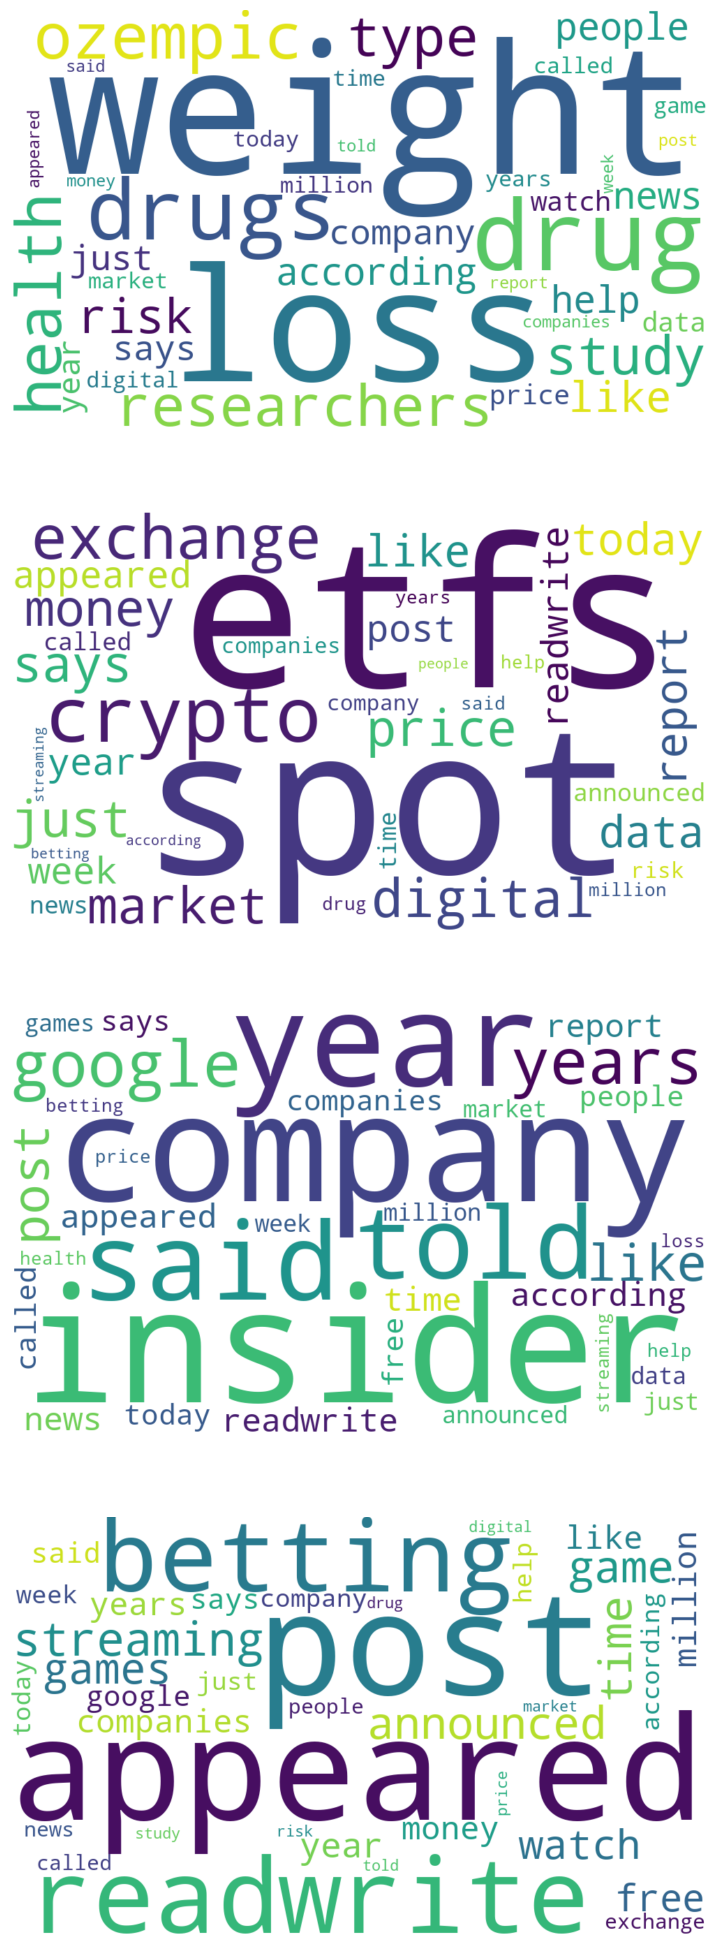

In [7]:
#############################################
##
## Create Training and Testing Data
##
## Then model and test the Decision Tree
##
################################################


## Before we start our modeling, let's visualize and
## explore.

##It might be very interesting to see the word clouds 
## for each  of the topics. 
##--------------------------------------------------------
List_of_WC=[]

for mytopic in topics:

    tempdf = Final_News_DF_Labeled[Final_News_DF_Labeled['LABEL'] == mytopic]
    print(tempdf)
    
    tempdf =tempdf.sum(axis=0,numeric_only=True)
    #print(tempdf)
    
    #Make var name
    NextVarName=str("wc"+str(mytopic))
    #print( NextVarName)
    
    ##In the same folder as this code, I have three images
    ## They are called: food.jpg, bitcoin.jpg, and sports.jpg
    #next_image=str(str(mytopic) + ".jpg")
    #print(next_image)
    
    ## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
    
    ###########
    ## Create and store in a list the wordcloud OBJECTS
    #########
    NextVarName = WordCloud(width=1000, height=600, background_color="white",
                   min_word_length=4, #mask=next_image,
                   max_words=200).generate_from_frequencies(tempdf)
    
    ## Here, this list holds all three wordclouds I am building
    List_of_WC.append(NextVarName)
    

##------------------------------------------------------------------
print(List_of_WC)
##########
########## Create the wordclouds
##########
fig=plt.figure(figsize=(25, 25))
#figure, axes = plt.subplots(nrows=2, ncols=2)
NumTopics=len(topics)
for i in range(NumTopics):
    print(i)
    ax = fig.add_subplot(NumTopics,1,i+1)
    plt.imshow(List_of_WC[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("NewClouds.pdf")
 
    
 


In [8]:
###############################################################
##
##               Model with two ML supervised options
##
##               DT
##               NB (multinomial)
##      
###############################################################         
## STEP 1   Create Training and Testing Data
###############################################################
## Write the dataframe to csv so you can use it later if you wish
##
Final_News_DF_Labeled.to_csv("Labeled_News_Data_from_API.csv")
TrainDF, TestDF = train_test_split(Final_News_DF_Labeled, test_size=0.3)
print(TrainDF)
print(TestDF)

#################################################
## STEP 2: Separate LABELS
#################################################
## IMPORTANT - YOU CANNOT LEAVE LABELS ON 
## Save labels

### TEST ---------------------
TestLabels=TestDF["LABEL"]
print(TestLabels)
TestDF = TestDF.drop(["LABEL"], axis=1)
print(TestDF)
### TRAIN----------------------
TrainLabels=TrainDF["LABEL"]
print(TrainLabels)
## remove labels
TrainDF = TrainDF.drop(["LABEL"], axis=1)

##################################################
## STEP 3:  Run MNB
##################################################

## Instantiate
MyModelNB= MultinomialNB()

## FIT
MyNB=MyModelNB.fit(TrainDF, TrainLabels)
#print(MyNB.classes_)
#print(MyNB.class_count_)
#print(MyNB.feature_log_prob_)


Prediction = MyModelNB.predict(TestDF)
print(np.round(MyModelNB.predict_proba(TestDF),2))

## COnfusion Matrix Accuracies
cnf_matrix = confusion_matrix(TestLabels, Prediction)
print("\nThe confusion matrix is:")
print(cnf_matrix)


##################################################
## STEP 3:  Run DT
##################################################







        



 



        LABEL  according  announced  appeared  betting  called  companies  \
178   bitcoin          0          0         0        0       0          0   
317    sports          0          0         0        0       0          0   
82   diabetes          0          0         0        0       0          0   
42   diabetes          0          0         0        0       0          0   
114   bitcoin          0          0         0        0       0          0   
..        ...        ...        ...       ...      ...     ...        ...   
391    sports          0          1         0        0       0          0   
131   bitcoin          0          0         0        0       0          0   
137   bitcoin          0          0         0        0       0          0   
109   bitcoin          0          0         0        0       0          0   
370    sports          0          0         1        0       0          0   

     company  crypto  data  ...  study  time  today  told  type  watch  wee